# Predicting the Success of Bank Telemarketing

## Goal

To predict the success of bank telemarketing, specifically determining whether a client has subscribed to a term deposit.

## Metadata

- **last contact date**: last contact date
- **age**: age of the client (numeric)
- **job**: type of job
- **marital**: marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
- **education** (categorical: "unknown", "secondary", "primary", "tertiary")
- **default**: has credit in default? (binary: "yes", "no")
- **balance**: average yearly balance, in euros (numeric)
- **housing**: has housing loan? (binary: "yes", "no")
- **loan**: has personal loan? (binary: "yes", "no")
- **contact**: contact communication type (categorical: "unknown", "telephone", "cellular")
- **duration**: last contact duration, in seconds (numeric)
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
- **target**: has the client subscribed a term deposit? (binary: "yes", "no")

---

**Pandas** is a popular Python library used for data manipulation and analysis. It provides powerful tools for working with structured data, such as tables or spreadsheets, making it an essential library in data science and machine learning workflows. It is intuitive, versatile, and seamlessly integrates with other Python libraries like **NumPy**, **Matplotlib**, and **Scikit-learn**, making it a cornerstone for data processing in Python.

In [1]:
import pandas as pd

## Submission File Generation

In [2]:
def submission_file_generator(model):
    test_set = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
    pred = model.predict(test_set)

    submission = pd.DataFrame({"id": range(0,test_set.shape[0]), "target": pred}) 

    submission.to_csv('submission.csv',index=False)
    print(submission.head(5))

## Trial Submission (Dummy Classifier)

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

X = df.drop("target", axis=1)
y = df['target']

model = DummyClassifier().fit(X,y)

y_pred=model.predict(X)

f1_score(y, y_pred, average='macro')

0.4598663819822301

F1 Score: `0.4598663819822301`

In [4]:
# commented out

# submission_file_generator(model)

## Train Dataset

In [5]:
train_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
train_df_copy = train_df

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a process to understand and summarize the main characteristics of a dataset before diving into modeling.
- **Overview of Data** involves looking at the dataset's structure, shape, and basic statistics to get a sense of its size and content.
- **Handling Missing Values** ensures data quality by identifying and appropriately managing gaps, either by filling them (imputation) or removing them.
- **Categorical Data** focuses on understanding patterns and distributions in non-numeric columns, such as using frequency tables or encoding for analysis.
- **Numerical Data** explores numerical columns through measures like mean, median, and variance, often visualized with histograms or boxplots.
- **Correlation** checks relationships between variables, often using heatmaps, to identify potential dependencies.
- **Unique** and **Duplicates** analysis ensures data integrity by finding redundant or repeated entries.
- **Bootstrap Plots** use resampling techniques to estimate the stability of statistics, helping to understand variability in the dataset. Together, these steps help uncover insights and prepare the data for modeling.

### Overview of Data

In [6]:
train_df_copy.shape

(39211, 16)

In [7]:
train_df_copy.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [8]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [9]:
train_df_copy['target'].value_counts()

target
no     33384
yes     5827
Name: count, dtype: int64

In [10]:
train_df_copy.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### Handling Missing Values

In [11]:
train_df_copy.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [12]:
train_df_copy.isna().sum() *100 / len(train_df_copy)

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

<Axes: >

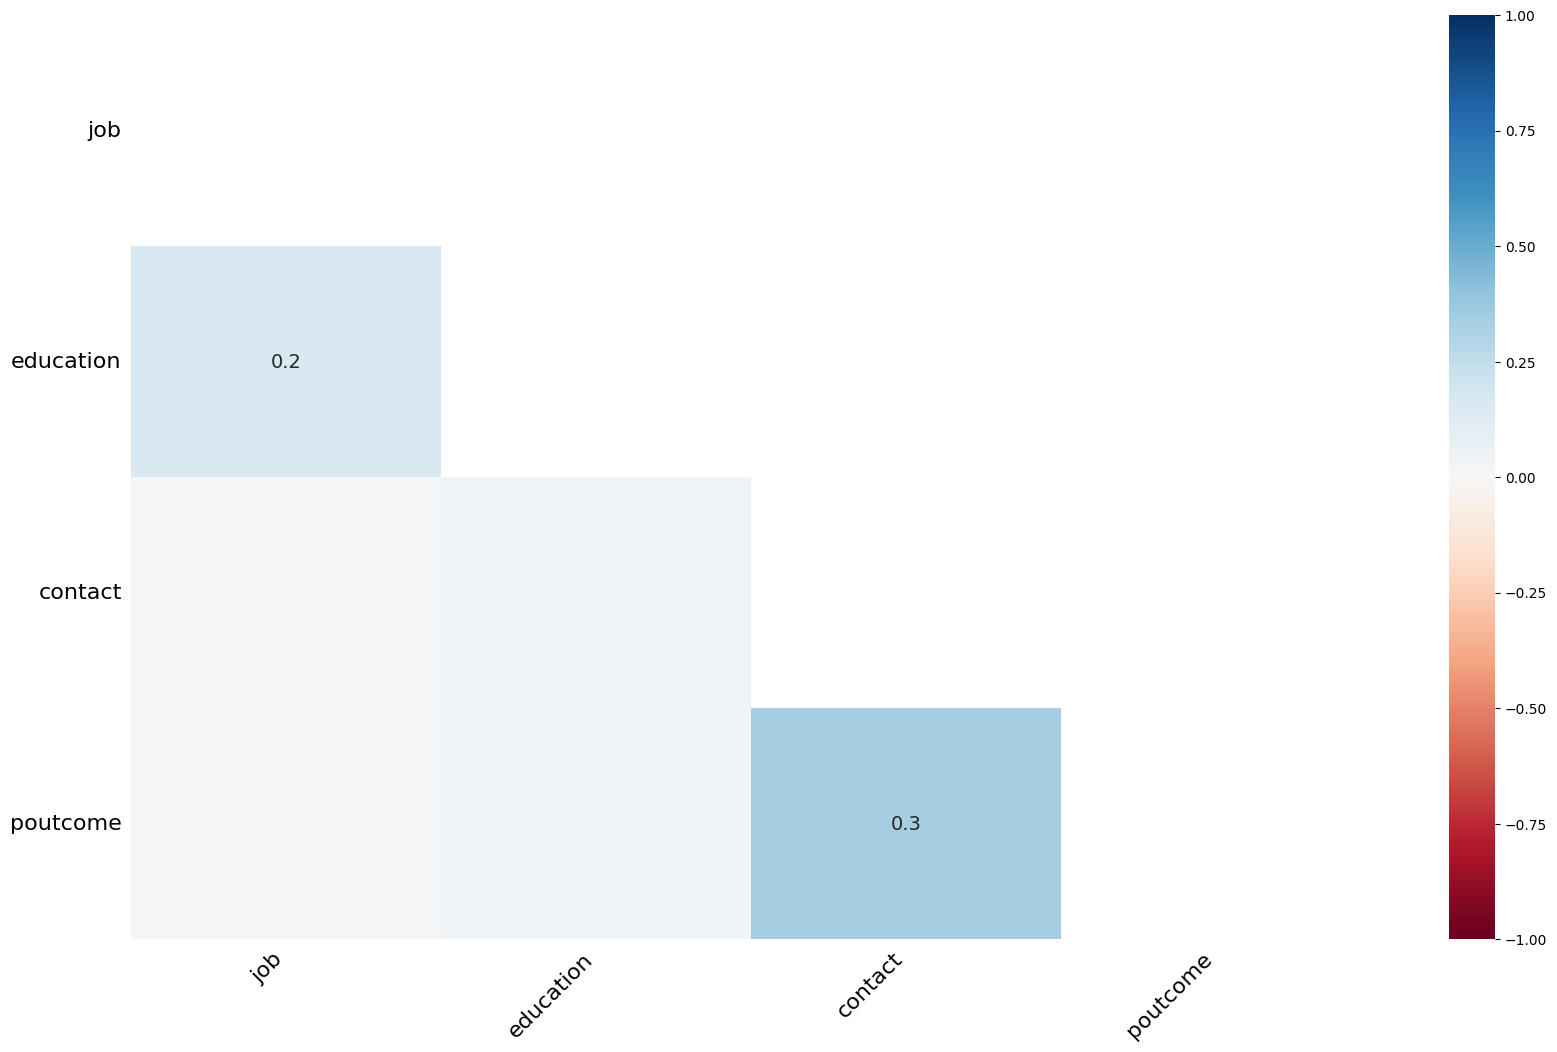

In [13]:
import missingno as msno

msno.heatmap(train_df_copy)

#### Observations

- **No Missing Values for Most Columns:** The majority of the values in the heatmap are blank or white, indicating that most columns in the dataset have little to no missing data.

- **Correlation Between Missing Values:** The numbers `0.2` and `0.3` indicate a correlation between missing values for the columns. For instance, there is a `30%` correlation between missing data in the `contact` and `poutcome` columns, suggesting that if one is missing, the other might also be missing.

- **Isolated Missingness:** Columns like `job` and others do not seem to have any notable correlation with missing data in other columns, indicating their missingness is likely independent.

- **Partial Data Completeness:** The low correlations (`0.2` and `0.3`) show that the dataset has some missing values, but the overall magnitude of missingness isn't extensive or highly structured.

- **Columns with Potential Imputation Needs:** The heatmap suggests that we may need to focus on handling missing data specifically in `education`, `contact`, and `poutcome`, given their non-zero correlations.

### Categorical Data

In [14]:
categorical_data_df = train_df_copy.select_dtypes(include=['object'])
categorical_data_df.head()

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
0,2009-04-17,blue-collar,married,secondary,no,yes,no,cellular,other,no
1,2009-10-11,technician,married,secondary,no,yes,no,telephone,NaN,no
2,2010-11-20,blue-collar,married,secondary,no,no,no,cellular,NaN,no
3,2009-09-01,admin.,married,secondary,no,yes,no,telephone,NaN,no
4,2008-01-29,entrepreneur,single,tertiary,no,no,no,cellular,NaN,no


In [15]:
categorical_data_df.describe()

,last contact date,job,marital,education,default,housing,loan,contact,poutcome,target
count,39211,38982,39211,37744,39211,39211,39211,28875,9760,39211
unique,1013,11,3,3,2,2,2,2,3,2
top,2009-05-15,blue-collar,married,secondary,no,yes,no,cellular,failure,no
freq,313,7776,22691,19584,36954,21657,31820,25030,4949,33384


In [16]:
train_df_copy[categorical_data_df.columns[8]].value_counts() 

poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64

<Axes: xlabel='job'>

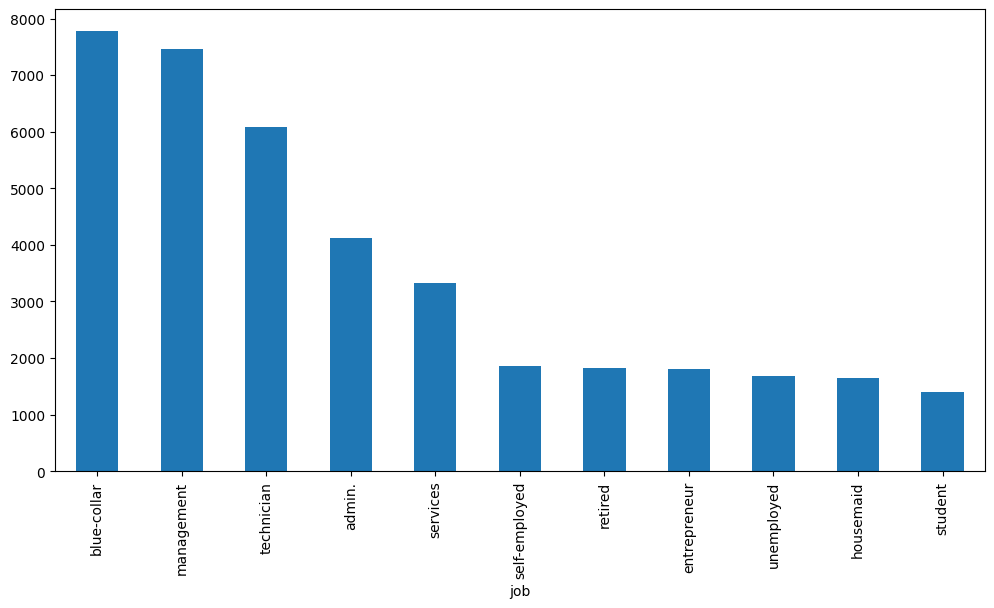

In [17]:
categorical_data_df[categorical_data_df.columns[1]].value_counts().plot(kind='bar', figsize=(12, 6))

#### Observations

- **Dominance of "Blue-Collar" Jobs:** The majority of individuals belong to the `blue-collar` job category, with the highest count of nearly `8000`, indicating this group constitutes a significant portion of the dataset.

- **"Management" and "Technician" Categories are Prominent:** Following `blue-collar`, the `management` and `technician` categories also have high counts, suggesting these are common job types in the dataset.

- **Low Representation for Certain Jobs:** Categories like `student`, `housemaid`, `unemployed`, and `entrepreneur` have significantly lower counts, indicating that these groups are underrepresented.

- **Potential Skew in Job Distribution:** The job distribution is highly imbalanced, with a few categories like `blue-collar` dominating, which could affect modeling, especially if the target variable depends heavily on job types.

- **Insights for Grouping:** Low-frequency job categories, such as `student` and `housemaid` could potentially be grouped together during preprocessing (if meaningful) to address the imbalance.

### Numerical Data

In [18]:
numerical_data_df = train_df_copy.select_dtypes(include=['int64'])
numerical_attributes_list = numerical_data_df.columns
numerical_data_df.head()

,age,balance,duration,campaign,pdays,previous
0,26,647,357,2,331,1
1,52,553,160,1,-1,0
2,44,1397,326,1,-1,0
3,33,394,104,3,-1,0
4,31,137,445,2,-1,0


In [19]:
numerical_data_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

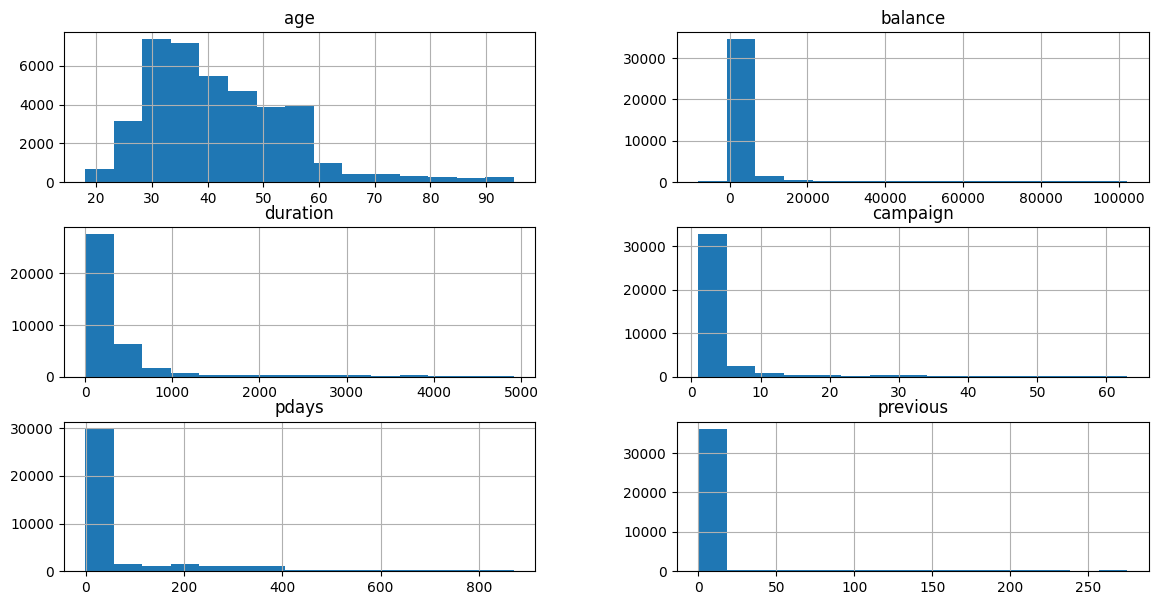

In [20]:
train_df_copy[numerical_attributes_list].hist(bins=15, figsize=(14, 7))

#### Observations

- **Age:** The distribution of `age` is skewed to the right, with most individuals aged between 20 and 60 years. There are fewer individuals in the dataset above 60 years, and very few under 20.

- **Duration:** The distribution of `duration` is highly right-skewed, with most durations concentrated at the lower end (close to 0). A small number of cases have significantly higher values, suggesting potential outliers.

- **Balance:** The `balance` attribute is heavily skewed to the right, with the majority of values concentrated near 0. A few extreme values suggest the presence of outliers or rare high balances.

- **Campaign:** Most `campaigns` involve very few contacts (close to 1 or 2), as seen by the steep drop-off. A small number of observations have high contact counts, which might indicate exceptional cases.

- **Pdays:** The majority of values of `pdays` are clustered around 0, possibly indicating that most individuals were not contacted in the past campaign. There are a few cases where pdays are significantly larger, indicating infrequent contacts for some.

- **Previous:** Similar to `pdays`, most values of `previous` are concentrated around 0, suggesting limited or no prior contact for most individuals. A small number of cases with higher values could represent clients with repeated interactions.

- **General Insights:** Most variables are highly skewed, with extreme outliers for attributes like `balance`, `duration` and `campaign`. The presence of outliers and imbalances in distributions could affect model performance and may require preprocessing techniques such as scaling, transformation, or capping extreme values. The patterns indicate the need for normalization or robust scalers for machine learning models.

In [21]:
numerical_attributes_list

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: >

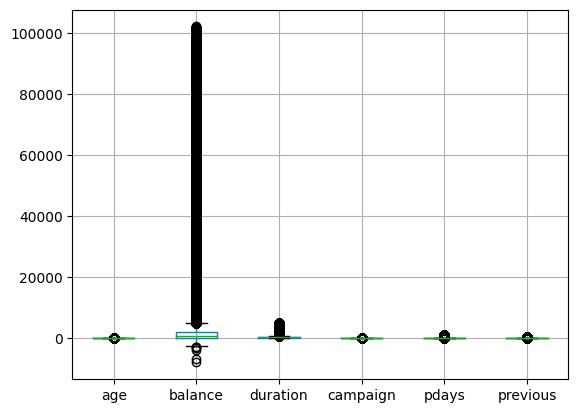

In [22]:
from pandas.plotting import boxplot

train_df_copy.boxplot(column=list(numerical_attributes_list))

#### Observations

- **Age:** The `age` attribute has a compact distribution with minimal outliers. Most values lie close to the central range, indicating a relatively uniform spread.
- **Balance:** The `balance` attribute shows extreme skewness with numerous outliers above the upper whisker. A small number of cases have negative balances (outliers below the lower whisker), but the extreme positive balances dominate.
- **Duration:** Similar to `balance`, the `duration` attribute has a significant number of outliers on the upper side, indicating that some individuals have unusually high durations. The main body of the data is concentrated near lower values.
- **Campaign:** The `campaign` attribute has outliers on the upper side, showing a few individuals contacted significantly more times than most. The majority of the data is tightly grouped near the lower whisker.
- **Pdays:** The `pdays` attribute displays a compact range for most data, but there are a few outliers above the upper whisker. This indicates infrequent past contacts for most individuals but very high values for some.
- **Previous:** The `previous` attribute is heavily skewed, with very few outliers on the upper end. Most values are near the lower whisker, suggesting limited prior interactions for the majority.
- **General Insights:** The attributes `balance`, `duration` and `campaign` have a large number of outliers, which can influence model training. These outliers may require handling strategies such as capping, removing, or transforming to improve model robustness. Attributes like `age` and `pdays` are more stable with fewer extreme values.

<Axes: >

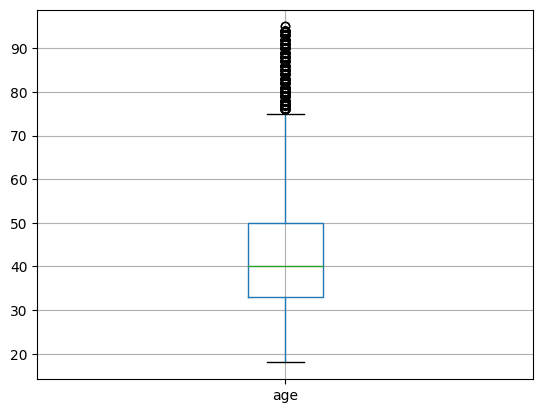

In [23]:
train_df_copy.boxplot(column='age')

#### Observations

- **Median Age:** The green line within the box indicates the median (50th percentile) age of the data. It is approximately `40` years.

- **Interquartile Range (IQR):** The box spans from the 25th percentile (Q1) to the 75th percentile (Q3), suggesting that most individuals fall between the ages of around `30` and `50`.

- **Outliers:** There are several outliers above the upper whisker (beyond the 75th percentile + 1.5 × IQR). These outliers represent individuals aged above approximately `70` years, which could be older participants in the dataset.

- **Age Distribution:** The age values are concentrated around the IQR (`30–50`), while the whiskers extend further down to around `20` (minimum) and up to around `70` (maximum, excluding outliers).

- **Skewness:** The presence of numerous outliers on the higher end suggests that the age distribution is slightly right-skewed (a longer tail on the higher end).

- **General Insights:** The majority of individuals in this dataset are between the ages of `30` and `50`, with a few older participants as outliers. The dataset may require special consideration for these outliers depending on the analysis or modeling goals.

<Axes: >

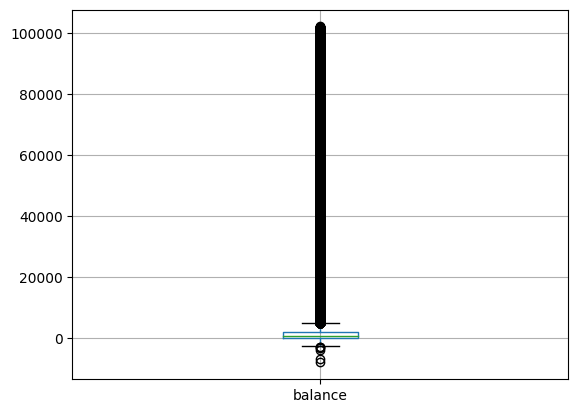

In [24]:
train_df_copy.boxplot(column='balance')

#### Observations

- **Median Balance:** The green line within the box represents the median (50th percentile) balance, which appears to be close to `0`.

- **Interquartile Range (IQR):** The box indicates the range between the 25th percentile (Q1) and 75th percentile (Q3). Most of the data is concentrated within this range, and it is relatively narrow, suggesting that balances for the majority of individuals are small.

- **Outliers:** There are a significant number of outliers above the upper whisker, extending up to `100,000`. These represent individuals with exceptionally high balances, which are far from the majority.

- **Negative Balances:** A few outliers are present below the lower whisker, indicating negative balances for some individuals, though these are rare.

- **Skewness:** The data is heavily right-skewed due to the numerous extreme positive outliers, while the main distribution is centered near zero.

- **Conclusion:** The majority of individuals have balances close to `0`, but there are extreme outliers on the higher end that may need to be handled during preprocessing (e.g., capping or scaling). Negative balances are rare and might also require special consideration depending on the analysis.g on the analysis.

<Axes: >

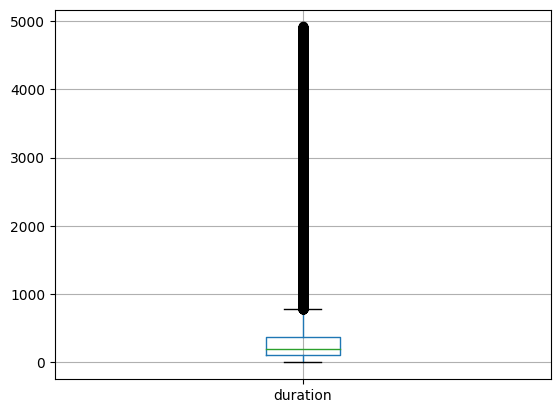

In [25]:
train_df_copy.boxplot(column='duration')

#### Observations

- **Median Duration:** The line within the box represents the median (50th percentile) duration, which is located closer to the lower part of the box. This indicates that the majority of the values are concentrated below the median.

- **Interquartile Range (IQR):** The box spans the range between the 25th percentile (Q1) and the 75th percentile (Q3), representing the middle 50% of the data. The IQR is relatively narrow, suggesting that most durations fall within a small range.

- **Outliers:** There are numerous outliers above the upper whisker, extending up to a maximum value close to `5000`. These represent durations that are exceptionally high compared to the bulk of the data.

- **Skewness:** The data is heavily right-skewed due to the presence of extreme positive outliers. The whisker on the upper side extends much farther than the lower whisker, highlighting the impact of the outliers.

- **General Insights:** The majority of durations are relatively low and tightly clustered, as indicated by the narrow IQR and the median's position. However, extreme outliers on the higher end dominate the distribution, potentially impacting analysis. These high-duration values may require investigation or preprocessing (e.g., scaling, capping, or transformation) to handle the skewness and ensure robust modeling.

<Axes: >

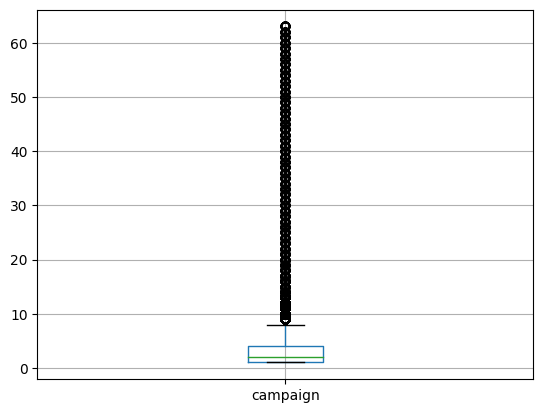

In [26]:
train_df_copy.boxplot(column='campaign')

#### Observations

- **Median Campaign:** The green line within the box represents the median (50th percentile) number of campaign contacts. It seems to be near `2`, indicating that most individuals received around two campaign calls.

- **Interquartile Range (IQR):** The box spans the 25th percentile (Q1) to the 75th percentile (Q3). The IQR is quite narrow, showing that the majority of campaign contact counts fall within a small range (approximately between `1` and `3`).

- **Outliers:** There is a significant number of outliers extending far above the upper whisker, reaching up to `60`. These outliers represent individuals who received an unusually high number of campaign calls.

- **Skewness:** The data is heavily right-skewed, with most of the values clustered near the lower end (around `1-3` contacts), but a long tail of high values caused by the outliers.

- **Whisker Limits:** The upper whisker ends around `5` or `6` contacts, indicating that beyond this, values are considered outliers. The lower whisker appears to begin at `1`.

- **General Insights:** The majority of individuals received a small number of campaign calls (around `1` to `3`). However, there are extreme outliers who were contacted as many as `60` times. These outliers might require special consideration, such as capping or further investigation, to prevent them from disproportionately influencing analyses.

<Axes: >

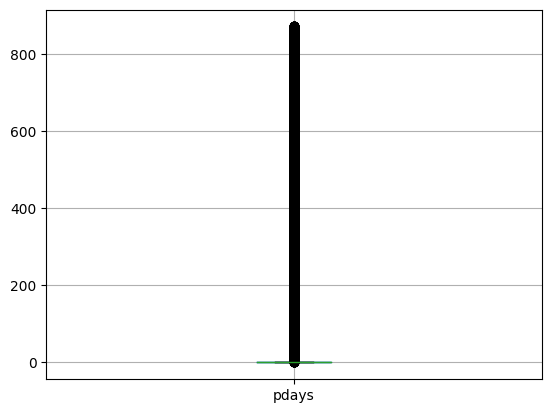

In [27]:
train_df_copy.boxplot(column='pdays')

#### Observations

- **Median pdays:** The green line within the box represents the median (50th percentile), which appears to be at `-1`. This suggests that more than half of the clients were not contacted in previous campaigns.

- **Interquartile Range (IQR):** The box is extremely narrow and close to `-1`, indicating that the 25th percentile (Q1) and 75th percentile (Q3) are also around `-1`. This means the majority of the data values are concentrated at `-1`, confirming that most clients were not previously contacted.

- **Outliers:** A significant number of extreme values are visible as outliers above the upper whisker, extending to values well above `800`. These outliers correspond to clients who were contacted a long time ago, indicating a heavy-tailed distribution for this variable.

- **Skewness:** The data is highly right-skewed because the majority of values are clustered at `-1`, and there are extreme positive outliers.

- **General Insights:** The pdays column is dominated by `-1`, indicating that most clients were not contacted in previous campaigns. However, there is a small subset of clients with high pdays values, representing outliers. These outliers might need special handling, such as normalization or imputation, during preprocessing, depending on the analysis context. Additionally, the concentration at `-1` may warrant separate analysis or encoding to highlight its significance.

<Axes: >

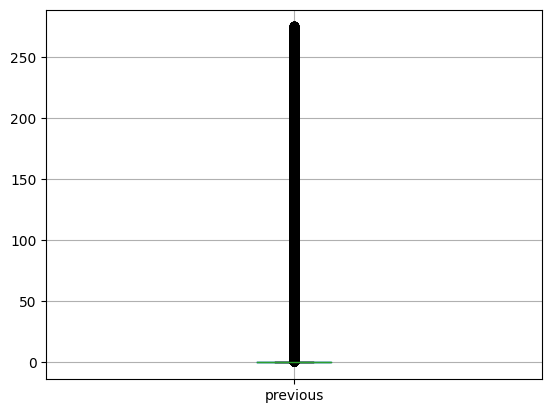

In [28]:
train_df_copy.boxplot(column='previous')

#### Observations

- **Median previous:** The green line within the box represents the median (50th percentile), which appears to be at or near `0`. This indicates that for more than half of the clients, no prior contacts were made before the current campaign.

- **Interquartile Range (IQR):** The box is very narrow and close to `0`, showing that the majority of the data falls between 0 (25th percentile, Q1) and a slightly higher value (75th percentile, Q3). Most clients had very few (if any) prior contacts.

- **Outliers:** A large number of extreme values are visible as outliers above the upper whisker, extending up to values exceeding `250`. These represent clients who were contacted multiple times in previous campaigns, far exceeding the majority.

- **Skewness:** The data is highly right-skewed, as most clients have `0` or very few previous contacts, with only a small proportion having a significantly higher number of contacts.

- **General Insights:** The previous column is dominated by clients who had no or very few prior contacts, as shown by the median and IQR being close to `0`. However, there are numerous outliers with high values for the number of previous contacts. These outliers may require special attention during preprocessing, such as normalization or capping, to reduce their impact on the analysis or model.

### Correlation

In [29]:
correlation = train_df_copy[numerical_data_df.columns].corr()
correlation

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.289150,0.255573,0.269439,0.199507,0.277487
balance,0.289150,1.000000,0.669737,0.674339,0.562097,0.716816
duration,0.255573,0.669737,1.000000,0.630944,0.527020,0.683951
campaign,0.269439,0.674339,0.630944,1.000000,0.519469,0.689211
pdays,0.199507,0.562097,0.527020,0.519469,1.000000,0.586175
previous,0.277487,0.716816,0.683951,0.689211,0.586175,1.000000


<Axes: >

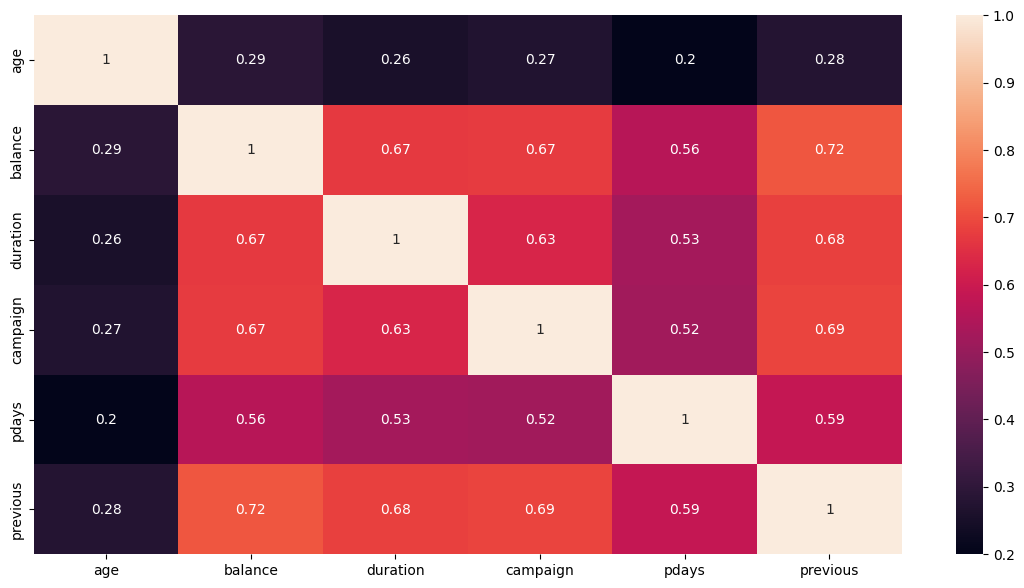

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

#### Observations

- `balance` and `previous` have a strong positive correlation (0.72), indicating that as the balance increases, the number of previous contacts also tends to increase.
- `duration` and `previous` (0.68) as well as `balance` and `duration` (0.67) also show strong relationships, suggesting an association between account balance, call duration, and prior interactions.
- `campaign` is moderately correlated with `balance` (0.67) and `duration` (0.63). This indicates that the number of calls in a campaign tends to align with these features.
- `pdays` has moderate correlations with `balance` (0.56), `duration` (0.53), and `campaign` (0.52).
- `age` shows weak correlations with all other variables, indicating it has less impact in direct relation to features like `balance`, `duration` and `pdays`.
- The variables `balance`, `duration` and `previous` are closely interrelated, suggesting they might be important for modeling or decision-making.
- Weak relationships with `age` indicate that it might not play a strong role in determining outcomes when paired with other variables.

### Relationships

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='duration', ylabel='age'>,
        <Axes: xlabel='campaign', ylabel='age'>,
        <Axes: xlabel='pdays', ylabel='age'>,
        <Axes: xlabel='previous', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='balance'>,
        <Axes: xlabel='balance', ylabel='balance'>,
        <Axes: xlabel='duration', ylabel='balance'>,
        <Axes: xlabel='campaign', ylabel='balance'>,
        <Axes: xlabel='pdays', ylabel='balance'>,
        <Axes: xlabel='previous', ylabel='balance'>],
       [<Axes: xlabel='age', ylabel='duration'>,
        <Axes: xlabel='balance', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='campaign', ylabel='duration'>,
        <Axes: xlabel='pdays', ylabel='duration'>,
        <Axes: xlabel='previous', ylabel='duration'>],
       [<Axes: xlabel='age', ylabel='campaign'>,
        <Axes: xlabel='balance', ylabel

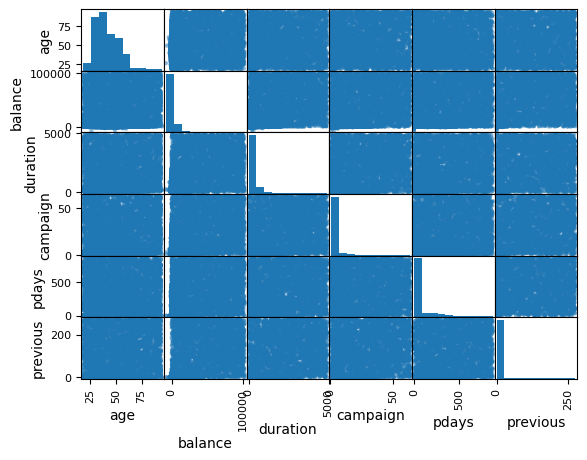

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df_copy[numerical_attributes_list])

#### Observations

Diagonal: Histograms
- **Age:** Skewed to the right, indicating most individuals are younger, with fewer older people.
- **Balance:** Heavily right-skewed with many individuals having low or zero balances, and a few outliers with very high balances.
- **Duration:** Also right-skewed, with most calls being short and a few significantly longer durations.
- **Campaign:** The distribution is tightly packed around low values, with most individuals receiving fewer contacts during a campaign.
- **Pdays and Previous:** Right-skewed, with most individuals having zero prior contact or days since the last contact.

Pairwise Relationships: Scatter Plots
- **Balance vs. Duration:** Displays a trend where higher balances correspond to longer durations of calls, consistent with the high correlation seen in the heatmap.
- **Balance vs. Previous:** A clear upward trend exists, with higher previous contacts generally corresponding to higher balances.
- **Pdays vs. Duration:** Some clustering near zero `pdays` indicates that many individuals were contacted for the first time during the campaign.
- **Age with Other Variables:** No strong visible trend between `age` and other features, consistent with weak correlations observed earlier.

Clusters or Outliers
- **Outliers in Balance:** Some individuals with extremely high balances stand out.
- **Duration:** A few very long call durations are noticeable as outliers.
- **Pdays and Campaign:** Most data is concentrated near zero, with some sparse values far from the bulk of the distribution.

General Insights
- `balance`, `duration` and `previous` exhibit visible relationships and might be critical for analysis or predictive modeling.
- `age` has no significant interaction patterns with other variables.
- The presence of outliers in several variables (e.g., `balance` and `duration`) might need special handling during data preprocessing.

### Unique

In [32]:
train_df_copy.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

### Duplicates

In [33]:
train_df_copy.duplicated().value_counts()

False    39211
Name: count, dtype: int64

### Bootstrap Plot

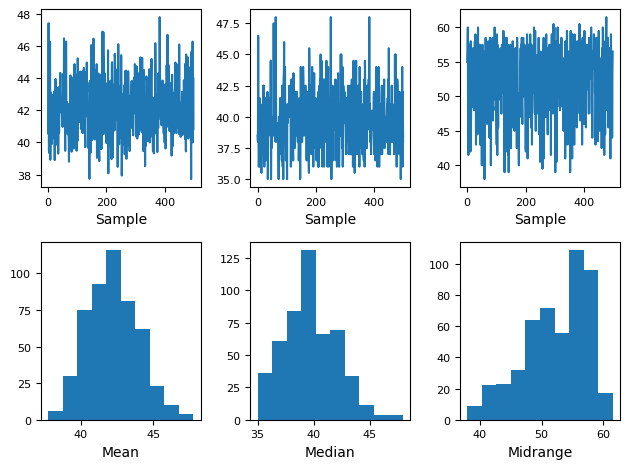

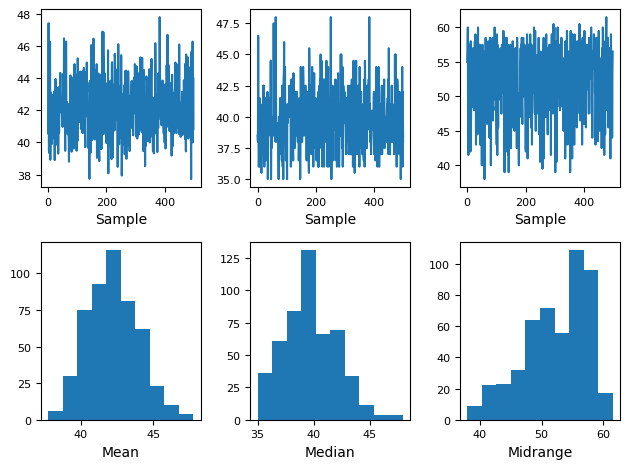

In [34]:
from pandas.plotting import bootstrap_plot

bootstrap_plot(train_df_copy['age'])

#### Observations

- **Mean vs. Median:** The close alignment of the mean and median distributions suggests that the age column is not heavily skewed.
- **Midrange Sensitivity:** The wider range of midrange values suggests that there are some extreme values (outliers) in the `age` column that impact the midrange more than the mean or median.
- **Resampling Variability:** The sampling variability (shown by the range in the histograms and line plots) is relatively low, indicating that the `age` data is fairly robust across resampling iterations.

## Test Dataset

In [35]:
test_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
test_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


## Sample Submission File

In [36]:
sample_submission_file_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
sample_submission_file_df.shape

(10000, 2)

## Data Preprocessing

Data preprocessing is the essential step of preparing raw data for analysis or machine learning models by cleaning, transforming, and organizing it.
- **Train-test split** divides the data into separate sets for training and testing the model, ensuring unbiased evaluation.
- **Simple Imputer** handles missing values by replacing them with a placeholder like the mean or median.
- **Column Transformer** allows different preprocessing steps to be applied to specific columns, such as numerical or categorical ones.
- **Pipeline** streamlines multiple preprocessing steps into a sequence for consistent and automated processing.
- **Scalers** like **StandardScaler**, **RobustScaler**, and **MinMaxScaler** normalize numerical data to improve model performance by scaling features to a specific range or distribution.
- **OneHotEncoder** and **OrdinalEncoder** transform categorical data into a format models can understand, either as binary vectors or numeric values based on order.
- **BaseEstimator** provides a common interface for estimators.
- **TransformerMixin** ensures custom transformers can integrate seamlessly into workflows.
- **NumPy** is a foundational library for numerical operations, enabling efficient handling of arrays and matrices essential for preprocessing.

Together, these tools create a well-prepared dataset for robust and accurate modeling.

In [37]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['target'], inplace=False)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

print(train_df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39211, 16)
(31368, 15) (31368,)
(7843, 15) (7843,)


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Date_Transformer(BaseEstimator, TransformerMixin):

    def __init__(self, date_format='%Y-%m-%d'):
        self.date_format = date_format
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        
        dates = pd.to_datetime(X, format=self.date_format)
        
        year = dates.dt.year.astype(int)
        month = dates.dt.month.astype(int)
        day = dates.dt.day.astype(int)
                
        return np.column_stack([year, month, day])

preprocessing_pipe = ColumnTransformer(
    transformers=[
        ('drop_column', 'drop', ['poutcome']),
        ('job_pipeline', Pipeline([
            ('impute_unknown', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('onehot', OneHotEncoder(sparse_output=False))
        ]), ['job']),
        
        ('education_pipeline', Pipeline([
            ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder())
        ]), ['education']),
        
        ('contact_pipeline', Pipeline([
            ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False))
        ]), ['contact']),
        
        ('binary_pipeline', OneHotEncoder(drop='if_binary'), ['default', 'housing', 'loan']),
        
        ('marital_pipeline', OneHotEncoder(sparse_output=False), ['marital']),
        
        ('age_scaler', StandardScaler(), ['age']),
        ('balance_scaler', RobustScaler(), ['balance', 'pdays']),
        ('duration_scaler', MinMaxScaler(), ['duration', 'campaign', 'previous']),

        ('date_transformer', Date_Transformer(), ['last contact date'])
    ]
)

## Feature Engineering

Feature engineering is present in the pipeline as the process of transforming and enriching the raw dataset into a format better suited for predictive modeling.

- **Drop_Column:** The column `poutcome` is explicitly dropped as it has a high number of missing values (`29451`).
  
- **SimpleImputer:** For the `job`, `education` and `contact` columns, missing values are imputed using strategies like `most_frequent` or `constant`, which helps preserve data integrity.

- **OneHotEncoder:** Categorical variables `job`, `contact`,  `default`, `housing`, `loan`, `marital`, are converted into numerical representations suitable for machine learning models.

- **OrdinalEncoder:** Used for `education`, due to an inherent order in categories (`primary < secondary < tertiary`).

- **StandardScaler:** Normalizes the `age` feature to zero mean and unit variance, making it comparable across models.

- **RobustScaler:** Scales `balance` and `pdays` robustly by reducing the influence of outliers.

- **MinMaxScaler:** Scales `duration`, `campaign` and `previous` to a range of 0 to 1 for consistency.

- **Breaking Down Date:** The custom transformer `Date_Transformer` extracts year, month, and day from a `last contact date` column, converting it into numerical components. This is a form of feature extraction that allows the model to learn patterns related to time.

In [39]:
from sklearn import set_config

set_config(display='diagram')
preprocessing_pipe

ColumnTransformer(transformers=[('drop_column', 'drop', ['poutcome']),
                                ('job_pipeline',
                                 Pipeline(steps=[('impute_unknown',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['job']),
                                ('education_pipeline',
                                 Pipeline(steps=[('impute_most_frequent',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  Ordi...
                                 OneHotEncoder(drop='if_binary'),
                                 ['default', 'housing', 'loan']),
                                ('marital_pipeline',
                                 OneHotEncoder(sparse_output=False),
                                 ['marital']),
                                ('age_scaler', StandardScaler(), ['age']),
                                ('balance_scaler', RobustScaler(),
                                 ['balance', 'pdays']),
                                ('duration_scaler', MinMaxScaler(),
                                 ['duration', 'campaign', 'previous']),
                                ('date_transformer', Date_Transformer(),
                                 ['last contact date'])])

In [40]:
X_train_preprocess = preprocessing_pipe.fit_transform(X_train)
len(X_train_preprocess[0])

30

## Model 1: Logistic Regression

Logistic Regression is a statistical model used for binary or multi-class classification problems, predicting probabilities of categories based on input features. In Python, the **LogisticRegression** class provides a way to fit this model to data, allowing for options like regularization to prevent overfitting.

In [41]:
from sklearn.linear_model import LogisticRegression

model_pipe_lr = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('lr_model', LogisticRegression(random_state=42, solver='liblinear', max_iter=2000))
])

In [42]:
lr_model = model_pipe_lr.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [43]:
f1_score(y_test, lr_y_pred, average='macro')

0.5702014678354299

F1 Score = `0.5702014678354299`

### Hyperparameter Tuning using LogisticRegressionCV

For improving model performance, **LogisticRegressionCV** automates hyperparameter tuning by using cross-validation to find the best values for parameters. This ensures that the model generalizes well to unseen data, making it a powerful tool for classification tasks.

In [44]:
from sklearn.linear_model import LogisticRegressionCV

model_pipe_logistic = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('logistic_model', LogisticRegressionCV(
        Cs=[0.01, 0.1, 1, 10, 100],
        cv=5,                       
        penalty='l2',
        scoring='f1_macro',
        max_iter=2000,
        random_state=42 
    ))
])

In [45]:
lr_cv_model = model_pipe_logistic.fit(X_train, y_train)
lr_cv_y_pred = lr_cv_model.predict(X_test)

In [46]:
f1_score(y_test, lr_cv_y_pred, average='macro')

0.571717512040596

F1 Score = `0.571717512040596`

#### Observations

- **Baseline F1-Score:** `0.5702` (Logistic Regression)
  
- **Hyperparameter-Tuned F1-Score:** `0.5717` (LogisticRegressionCV)

- **Improvement:** Marginal increase of `+0.0015` in F1-Score.

- **Hyperparameter Tuning:** Explored regularization strengths (`C`s) with cross-validation (`cv=5`), but gains were minimal.

- **Bias-Variance Tradeoff:** The baseline model already had a reasonable tradeoff; tuning didn’t significantly help.

- **Regularization Insights:** Optimal `C` was likely close to the default (`C=1`), suggesting minimal over/underfitting issues.

## Model 2: K-Nearest Neighbours

K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for classification and regression. It works by identifying the 'k' nearest data points to a query point and assigning the most common class among them. The **KNeighborsClassifier** in Python implements this algorithm for classification tasks.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('knn_model', KNeighborsClassifier())
])

In [48]:
knn_model = knn_model_pipe.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

In [49]:
f1_score(y_test, knn_y_pred, average='macro')

0.63788367289247

F1 Score = `0.63788367289247`

### Hyperparameter Tuning

To optimize KNN's performance, **GridSearchCV** can be used for hyperparameter tuning, such as finding the best value of 'k' or distance metrics.

In [50]:
knn_param_grid = {
    'knn_model__n_neighbors': [3, 5, 7],
    'knn_model__weights': ['uniform', 'distance'],
}

In [51]:
from sklearn.model_selection import GridSearchCV

# commented out

# knn_grid_search = GridSearchCV(knn_model_pipe, knn_param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
# knn_grid_search.fit(X_train, y_train)

# print(knn_grid_search.best_estimator_)
# print(knn_grid_search.best_params_)
# print(knn_grid_search.best_score_)

# Fitting 5 folds for each of 6 candidates, totalling 30 fits
# Pipeline(steps=[('preprocess',
#                  ColumnTransformer(transformers=[('drop_column', 'drop',
#                                                   ['poutcome']),
#                                                  ('job_pipeline',
#                                                   Pipeline(steps=[('impute_unknown',
#                                                                    SimpleImputer(fill_value='unknown',
#                                                                                  strategy='constant')),
#                                                                   ('onehot',
#                                                                    OneHotEncoder(sparse_output=False))]),
#                                                   ['job']),
#                                                  ('education_pipeline',
#                                                   Pipeline(steps=[('impute_most_frequent',
#                                                                    SimpleImputer(strategy='mo...
#                                                    'loan']),
#                                                  ('marital_pipeline',
#                                                   OneHotEncoder(sparse_output=False),
#                                                   ['marital']),
#                                                  ('age_scaler',
#                                                   StandardScaler(), ['age']),
#                                                  ('balance_scaler',
#                                                   RobustScaler(),
#                                                   ['balance', 'pdays']),
#                                                  ('duration_scaler',
#                                                   MinMaxScaler(),
#                                                   ['duration', 'campaign',
#                                                    'previous']),
#                                                  ('date_transformer',
#                                                   DateTransformer(),
#                                                   ['last contact date'])])),
#                 ('knn_model', KNeighborsClassifier(n_neighbors=3))])

In [52]:
gridcv_knn_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('knn_model', KNeighborsClassifier(n_neighbors=3))
])

In [53]:
gridcv_knn_model = gridcv_knn_model_pipe.fit(X_train, y_train)
gridcv_knn_y_pred = gridcv_knn_model.predict(X_test)

In [54]:
f1_score(y_test, gridcv_knn_y_pred, average='macro')

0.6386156845062445

F1 Score = `0.6386156845062445`

#### Observations

- **Baseline F1-Score:** `0.6379` (KNeighborsClassifier with default settings).

- **Hyperparameter-Tuned F1-Score:** `0.6386` (KNeighborsClassifier with `n_neighbors=3` and `weights='uniform'`).

- **Improvement:** Marginal increase of `+0.0007` in F1-Score.

- **Hyperparameter Tuning:** Explored `n_neighbors` (3, 5, 7) and `weights` (`uniform`, `distance`), but gains were minimal.

- **Effect of `n_neighbors`:** Reducing neighbors to 3 improved local decision boundaries slightly, indicating a better fit for the data.

- **Computational Complexity:** Tuning added overhead due to GridSearchCV’s 30 fits, though results didn’t justify the added cost.

- **Bias-Variance Tradeoff:** Default settings already balanced bias and variance well; tuning slightly reduced bias.

- **Local Sensitivity:** Smaller `n_neighbors` made the model more sensitive to local data structures, marginally improving performance.

### Evaluating the model

After training, the model is evaluated using tools like the **confusion_matrix**, which shows the counts of true positives, false positives, true negatives, and false negatives. The **ConfusionMatrixDisplay** provides a visual representation, while the **classification_report** summarizes precision, recall, F1-score, and accuracy for each class, helping to assess the model's effectiveness comprehensively.

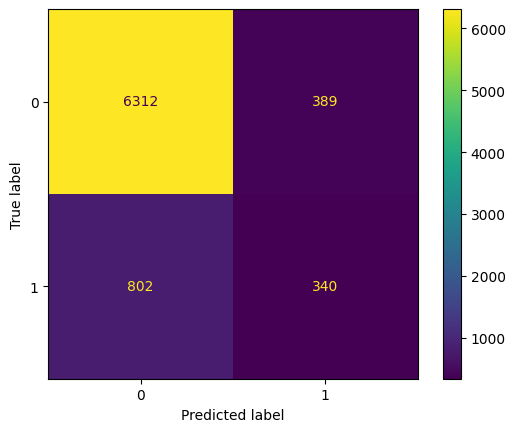

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, gridcv_knn_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gridcv_knn_y_pred))

              precision    recall  f1-score   support

          no       0.89      0.94      0.91      6701
         yes       0.47      0.30      0.36      1142

    accuracy                           0.85      7843
   macro avg       0.68      0.62      0.64      7843
weighted avg       0.83      0.85      0.83      7843



## Model 3: Random Forest Classifier

The Random Forest Classifier is a robust ensemble learning method that combines multiple decision trees to improve classification accuracy and prevent overfitting. The **RandomForestClassifier** in Python implements this algorithm, offering flexibility through various hyperparameters.

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('rf_model', RandomForestClassifier())
])

In [58]:
rf_model = rf_model_pipe.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [59]:
f1_score(y_test, rf_y_pred, average='macro')

0.6923649391538081

F1 Score = `0.692068025198163`

### Hyperparameter Tuning

 **RandomizedSearchCV** is commonly used to tune hyperparameters like the number of trees, maximum depth, and split criteria, helping to optimize performance.

In [60]:
rf_param_grid = {
    'rf_model__n_estimators': [100, 200, 300],
    'rf_model__max_depth': [None, 10, 20, 30],        
    'rf_model__min_samples_split': [2, 5, 10],        
    'rf_model__min_samples_leaf': [1, 2, 4],          
    'rf_model__max_features': ['sqrt', 'log2', None]  
}

### RandomizedSearchCV

In [61]:
# commented out

from sklearn.model_selection import RandomizedSearchCV

# rf_grid_search = RandomizedSearchCV(rf_model_pipe, rf_param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1, n_iter=50)
# rf_grid_search.fit(X_train, y_train)

# print(rf_grid_search.best_estimator_)
# print(rf_grid_search.best_params_)

In [62]:
# commented out

# randomcv_best_model = rf_random_search_pipe[-1].best_estimator_
# randomcv_rf_model = randomcv_best_model.fit(X_train, y_train)
# randomcv_rf_model

In [63]:
# used randomcv to get best hyperparameters using it directly
randomcv_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('rf_model_randomcv', RandomForestClassifier(
                                        max_depth=20, 
                                        max_features=None,
                                        min_samples_leaf=2,
                                        n_estimators=300,
                                        class_weight='balanced')
    )
])
randomcv_rf_model = randomcv_model_pipe.fit(X_train, y_train)
randomcv_rf_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('drop_column', 'drop',
                                                  ['poutcome']),
                                                 ('job_pipeline',
                                                  Pipeline(steps=[('impute_unknown',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['job']),
                                                 ('education_pipeline',
                                                  Pipeline(steps=[('impute_most_frequent',
                                                                   SimpleImputer(strategy='mo...
                                                  StandardScaler(), ['age']),
                                                 ('balance_scaler',
                                                  RobustScaler(),
                                                  ['balance', 'pdays']),
                                                 ('duration_scaler',
                                                  MinMaxScaler(),
                                                  ['duration', 'campaign',
                                                   'previous']),
                                                 ('date_transformer',
                                                  Date_Transformer(),
                                                  ['last contact date'])])),
                ('rf_model_randomcv',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_features=None, min_samples_leaf=2,
                                        n_estimators=300))])

In [64]:
randomcv_rf_y_pred = randomcv_rf_model.predict(X_test)
f1_score(y_test, randomcv_rf_y_pred, average='macro')

0.7530479476560181

F1 Score = `0.7522489896432369`

#### Observations

- **Baseline F1-Score:** `0.6941` (RandomForestClassifier with default parameters).

- **Hyperparameter-Tuned F1-Score:** `0.7532` (RandomForestClassifier with `n_estimators=300`, `max_depth=20`, `max_features=None`, `min_samples_leaf=2` and `class_weight='balanced'`).

- **Improvement:** Significant increase of `+0.0591` in F1-Score after hyperparameter tuning.

- **Key Hyperparameters Tuned:** Increased `n_estimators` to 300 for better averaging and stability, restricted `max_depth` to 20 to prevent overfitting, used `min_samples_leaf=2` to ensure splits result in meaningful subsets, set `class_weight='balanced'` to handle class imbalance effectively,

- **Impact of Class Weighting:** Balancing the classes improved predictions for minority classes, contributing to higher F1-Score.

- **Bias-Variance Tradeoff:** Baseline model had lower bias but higher variance. Tuning parameters reduced variance while maintaining good bias control.

- **Model Stability:** Increasing the number of trees (`n_estimators`) made predictions more robust across folds and datasets.

### Dimensionality Reduction

**PCA** (Principal Component Analysis) is used for dimensionality reduction to simplify data while retaining significant variance.

In [65]:
from sklearn.decomposition import PCA

rf_model_pipe_with_pca = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('pca', PCA(n_components=0.95)),
    ('rf_model', RandomForestClassifier(
        max_depth=20, 
        max_features=None,
        min_samples_leaf=2,
        n_estimators=300,
        class_weight='balanced'
    ))
])

pca = rf_model_pipe_with_pca.fit(X_train, y_train)
pca

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('drop_column', 'drop',
                                                  ['poutcome']),
                                                 ('job_pipeline',
                                                  Pipeline(steps=[('impute_unknown',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['job']),
                                                 ('education_pipeline',
                                                  Pipeline(steps=[('impute_most_frequent',
                                                                   SimpleImputer(strategy='mo...
                                                  StandardScaler(), ['age']),
                                                 ('balance_scaler',
                                                  RobustScaler(),
                                                  ['balance', 'pdays']),
                                                 ('duration_scaler',
                                                  MinMaxScaler(),
                                                  ['duration', 'campaign',
                                                   'previous']),
                                                 ('date_transformer',
                                                  Date_Transformer(),
                                                  ['last contact date'])])),
                ('pca', PCA(n_components=0.95)),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_features=None, min_samples_leaf=2,
                                        n_estimators=300))])

In [66]:
pca_y_pred = pca.predict(X_test)
f1_score(y_test, pca_y_pred, average='macro')

0.6331046996618971

F1 Score = `0.632687854233173`

#### Observations

While **PCA** can be helpful for speeding up training and reducing noise, it can also discard useful information that might be critical for models like **Random Forest Classifier**. In this case, the model's predictive power suffered because the dimensionality reduction removed features or interactions that were essential for making accurate predictions.

### Evaluating the model

Model evaluation involves tools like the **confusion_matrix** for understanding prediction errors, the **ConfusionMatrixDisplay** for a visual summary, and the **classification_report** for precision, recall, F1-score, and overall performance metrics, enabling a comprehensive assessment of the model's effectiveness.

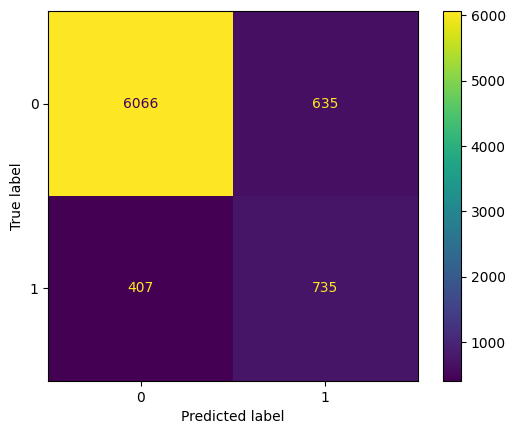

In [67]:
cm = confusion_matrix(y_test, randomcv_rf_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [68]:
print(classification_report(y_test, randomcv_rf_y_pred))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92      6701
         yes       0.54      0.64      0.59      1142

    accuracy                           0.87      7843
   macro avg       0.74      0.77      0.75      7843
weighted avg       0.88      0.87      0.87      7843



## Model 4: HistGradientBoostingClassifier

The **HistGradientBoostingClassifier** is a high-performance implementation of gradient boosting, designed for faster training on large datasets by binning continuous features into discrete bins. It builds decision trees sequentially, where each tree corrects the errors of the previous ones, making it effective for complex datasets.

In [69]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('hgbc_model', HistGradientBoostingClassifier(class_weight='balanced'))
])

In [70]:
hgbc_model = hgbc_model_pipe.fit(X_train, y_train)
hgbc_y_pred = hgbc_model.predict(X_test)

In [71]:
f1_score(y_test, hgbc_y_pred, average='macro')

0.7494458012193335

F1 Score = `0.7504407226774947`

### Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning with **GridSearchCV** allows for systematic exploration of parameters like the number of iterations, learning rate, maximum tree depth, and the number of bins, ensuring the model is optimized for the specific dataset. This classifier is particularly efficient in handling numerical and categorical data, and its scalability makes it a popular choice for structured data classification tasks.

In [72]:
hgbc_param_grid = {
    'hgbc_model__learning_rate': [0.05, 0.1],
    'hgbc_model__max_iter': [100, 200],
    'hgbc_model__max_depth': [5, 10],
    'hgbc_model__min_samples_leaf': [10, 20],
}

In [73]:
# hgbc_grid_search = GridSearchCV(hgbc_model_pipe, hgbc_param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
# hgbc_grid_search.fit(X_train, y_train)

# print(hgbc_grid_search.best_estimator_)
# print(hgbc_grid_search.best_params_)
# print(hgbc_grid_search.best_score_)

# Fitting 5 folds for each of 16 candidates, totalling 80 fits
# Pipeline(steps=[('preprocess',
#                  ColumnTransformer(transformers=[('drop_column', 'drop',
#                                                   ['poutcome']),
#                                                  ('job_pipeline',
#                                                   Pipeline(steps=[('impute_unknown',
#                                                                    SimpleImputer(fill_value='unknown',
#                                                                                  strategy='constant')),
#                                                                   ('onehot',
#                                                                    OneHotEncoder(sparse_output=False))]),
#                                                   ['job']),
#                                                  ('education_pipeline',
#                                                   Pipeline(steps=[('impute_most_frequent',
#                                                                    SimpleImputer(strategy='mo...
#                                                   OneHotEncoder(sparse_output=False),
#                                                   ['marital']),
#                                                  ('age_scaler',
#                                                   StandardScaler(), ['age']),
#                                                  ('balance_scaler',
#                                                   RobustScaler(),
#                                                   ['balance', 'pdays']),
#                                                  ('duration_scaler',
#                                                   MinMaxScaler(),
#                                                   ['duration', 'campaign',
#                                                    'previous']),
#                                                  ('date_transformer',
#                                                   DateTransformer(),
#                                                   ['last contact date'])])),
#                 ('hgbc_model',
#                  HistGradientBoostingClassifier(class_weight='balanced',
#                                                 max_depth=10,
#                                                 min_samples_leaf=10))])
# {'hgbc_model__learning_rate': 0.1, 'hgbc_model__max_depth': 10, 'hgbc_model__max_iter': 100, 'hgbc_model__min_samples_leaf': 10}

In [74]:
gridcv_hgbc_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('gridcv_hgbc_model', HistGradientBoostingClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=10))
])

In [75]:
gridcv_hgbc_model = gridcv_hgbc_model_pipe.fit(X_train, y_train)
gridcv_hgbc_y_pred = gridcv_hgbc_model.predict(X_test)

In [76]:
f1_score(y_test, gridcv_hgbc_y_pred, average='macro')

0.7490719894588529

F1 Score = `0.7484462956913771`

#### Observations

- **Baseline F1-Score:** `0.7509` (HistGradientBoostingClassifier with default settings).

- **Hyperparameter-Tuned F1-Score:** `0.7495` (HistGradientBoostingClassifier with `max_depth=10`, `min_samples_leaf=10`).

- **Improvement:** Marginal decrease of `-0.0015` in F1-Score.

- **Hyperparameter Tuning:** Explored `learning_rate`, `max_iter`, `max_depth` and `min_samples_leaf`, but gains were minimal.

- **Effect of Tuning:** The tuned parameters did not significantly outperform the baseline, indicating the model was already near optimal.

- **Model Complexity:** Increased complexity (higher `max_depth`) did not lead to better generalization, possibly due to overfitting.

- **Class Weight:** Both models used `class_weight='balanced'`, which effectively handled class imbalance.

## Choosing the Best Model

In [77]:
# Constructing a dictionary to store model names as keys and their corresponding F1 scores obtained after hyperparameter tuning as values

models_dict = {'LogisticRegression': 0.571717512040596,
             'KNearestNeighbours': 0.6386156845062445, 
             'RandomForestClassifier': 0.7522489896432369,
             'HistGradientBoostingClassifier': 0.7484462956913771}
models_df = pd.DataFrame()
models_df['Model'] = models_dict.keys()
models_df['F1 Score'] = models_dict.values()
models_df

,Model,F1 Score
0,LogisticRegression,0.571718
1,KNearestNeighbours,0.638616
2,RandomForestClassifier,0.752249
3,HistGradientBoostingClassifier,0.748446


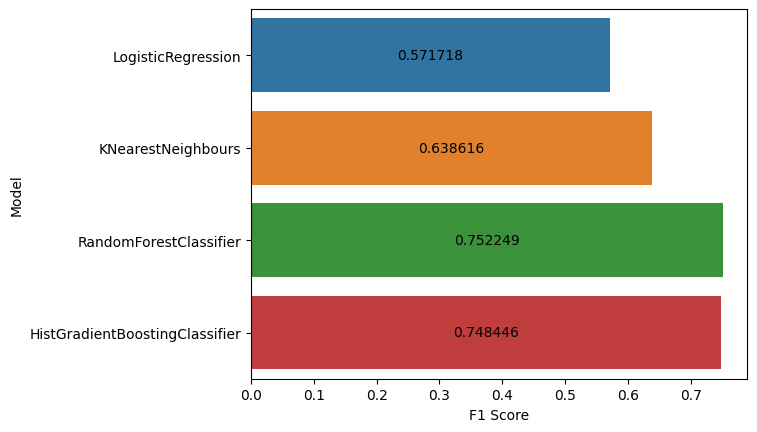

In [78]:
ax = sns.barplot(data=models_df, x='F1 Score', y='Model')
ax.bar_label(ax.containers[0], fontsize=10, label_type='center')
plt.show()

Based on the F1 score, **RandomForestClassifier** with hyperparameters tuned using **RandomizedSearchCV** is chosen for the final submission.

## Final Submission

In [79]:
# Generating submission.csv file for final submission

submission_file_generator(randomcv_rf_model)

   id target
0   0     no
1   1     no
2   2     no
3   3     no
4   4    yes
